In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('../Desktop/train.csv')
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data['Sex'] = data['Sex'].apply(lambda i : 1 if i == 'male' else 0) #Заменяем все 'male' на 1, все 'female' на 0
data['Age'].fillna(-1, inplace=True) #Заливаем все NaN -1

surv = data['Survived']
features = data.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(features, surv, test_size=0.2, random_state=10)

In [5]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
print('score', model.score(x_train, y_train))
print('score', model.score(x_test, y_test))

score 0.37319169044560463
score 0.4077792976794723


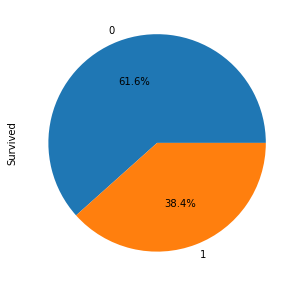

In [6]:
predict = model.predict(x_test)
lenght = len(predict)
for i in range(lenght):
    if predict[i] < 0.5:
        predict[i] = 0
    else:
        predict[i] = 1
plt.figure(figsize=(10, 5))
data['Survived'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.7988826815642458

In [8]:
#GPT-3
#OpenAI